In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from functools import reduce
import shapely
from shapely.geometry import Polygon, Point

In [2]:
onshore = pd.read_csv('../EU10CS/3_intermediate_data/areas_europe_aggregated_wind_onshore.csv',header=None, sep=" ").rename(columns={0 : 'untitled', 1 : 'area'})
offshore = pd.read_csv('../EU10CS/3_intermediate_data/areas_europe_aggregated_wind_offshore_bottom.csv', header=None, sep =" ").rename(columns={0 : 'untitled', 1 : 'area'})
solar = pd.read_csv('../EU10CS/3_intermediate_data/areas_europe_aggregated_solar.csv', header=None, sep = " ").rename(columns={0 : 'untitled', 1 : 'area'})

onshore = onshore.assign(
    country = lambda x: x.untitled.str.strip().str[-2:],
    tech = 'onshore'
).drop(columns={'untitled'})
offshore = offshore.assign(
    country = lambda x: x.untitled.str.strip().str[-2:],
    tech = 'offshore'
).drop(columns={'untitled'})
solar = solar.assign(
    country = lambda x: x.untitled.str.strip().str[-2:],
    tech = 'solar'
).drop(columns={'untitled'})

In [3]:
frames = [onshore, offshore, solar]
areas = pd.concat(frames)

In [4]:
areas.set_index(['country','tech']).sort_index().unstack()

area                    
tech     offshore   onshore     solar
country                              
AT            NaN    8772.1    3600.3
BE         2713.1    6018.6    1016.4
BG         3212.2   16087.1   11972.5
CH            NaN     552.3    1865.5
CZ            NaN   29570.3    2603.1
DE        29038.0  132204.6   10715.7
DK        63885.8   24216.0    1807.1
EE         9823.4   33286.6    3776.3
ES         3999.4  152886.1  114095.2
FI        21036.1  237268.3   13591.2
FR        33488.9  245082.2   31452.3
GR         1682.5   14138.3   33017.7
HR         8476.6    4613.5    9211.3
HU            NaN   27744.5    6441.2
IE         8404.0   49365.7    4313.9
IT        14847.5   28164.5   25522.0
LT         4111.5   46526.7    3315.4
LU            NaN     622.3      47.0
LV        11564.1   49594.9    9641.1
NL        45445.3   15115.0    1191.8
NO        25018.4   73657.3   74098.1
PL        13849.4  170109.6    8193.9
PT         2014.3   35691.3   23961.5
RO        12674.7   32941.4   11205.1
SE        43755.3  236069.3   49815.8
SI            0.0    1936.3     716.2
SK            NaN    7554.6    1943.9
UK       137203.8  128208.9   29808.9

In [5]:
nuts_to_ssb = {
 'NO081': 'NO03',
 'NO082': 'NO30',
 'NO020': 'NO34',
 'NO091': 'NO38',
 'NO092': 'NO42',
 'NO0A1': 'NO11',
 'NO0A2': 'NO46',
 'NO0A3': 'NO15',
 'NO060': 'NO50',
 'NO071': 'NO18',
 'NO074': 'NO54'
 }

In [6]:
highRES_zones = pd.read_csv('../EU10CS/2_preparation_code/front_end/data/zonal_def/zones.csv')

In [7]:
len(highRES_zones)

28

In [8]:
shape_europe = gpd.read_file(
    '../../../oskar/shared_input/NUTS_RG_10M_2021_4326.geojson',
    crs = "EPSG:4326"
)

In [9]:
highRES_shape = shape_europe.copy()
highRES_shape = highRES_shape.replace({
    'EL' : 'GR',
    'GB' : 'UK',
}
)

In [10]:
highRES_shape = highRES_shape[highRES_shape['id'].isin(highRES_zones.zone)]

In [11]:
highRES_shape["center"] = highRES_shape["geometry"].centroid
highRES_shape["rep"] = highRES_shape["geometry"].representative_point()

points_europe = highRES_shape.copy()
points_europe.set_geometry("rep", inplace = True)


/tmp/ipykernel_1480890/2896830849.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  highRES_shape["center"] = highRES_shape["geometry"].centroid


In [12]:
points_europe

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,center,rep
1902,AT,AT,0,AT,Österreich,Österreich,0.0,0,0,AT,"POLYGON ((15.54245 48.90770, 15.75363 48.85218...",POINT (14.13941 47.58739),POINT (14.76527 47.69208)
1903,BE,BE,0,BE,Belgique/België,Belgique/België,0.0,0,0,BE,"POLYGON ((5.10218 51.42900, 5.08780 51.38230, ...",POINT (4.66403 50.64045),POINT (4.88182 50.50927)
1916,DK,DK,0,DK,Danmark,Danmark,0.0,0,0,DK,"MULTIPOLYGON (((14.82540 55.25410, 14.94371 55...",POINT (10.04638 55.96693),POINT (9.25017 56.24825)
1920,DE,DE,0,DE,Deutschland,Deutschland,0.0,0,0,DE,"MULTIPOLYGON (((9.42015 54.83196, 9.42293 54.8...",POINT (10.39193 51.10700),POINT (10.50451 51.09207)
1930,NL,NL,0,NL,Nederland,Nederland,0.0,0,0,NL,"MULTIPOLYGON (((6.87491 53.40801, 6.91836 53.3...",POINT (5.59203 52.26979),POINT (5.48510 52.08635)
1931,PL,PL,0,PL,Polska,Polska,0.0,0,0,PL,"MULTIPOLYGON (((18.95003 54.35831, 19.35966 54...",POINT (19.40204 52.12512),POINT (19.16210 51.92426)
1932,PT,PT,0,PT,Portugal,Portugal,0.0,0,0,PT,"MULTIPOLYGON (((-8.16508 41.81830, -8.05186 41...",POINT (-8.51520 39.59611),POINT (-8.27414 39.51375)
1934,UK,UK,0,UK,United Kingdom,United Kingdom,0.0,0,0,UK,"MULTIPOLYGON (((-0.24042 51.49011, -0.22283 51...",POINT (-2.90206 54.16183),POINT (-1.91798 54.31086)
1941,ES,ES,0,ES,España,España,0.0,0,0,ES,"MULTIPOLYGON (((4.28746 39.82237, 4.24593 39.8...",POINT (-3.64487 40.22683),POINT (-3.46921 39.89173)
1951,BG,BG,0,BG,Bulgaria,България,0.0,0,0,BG,"POLYGON ((22.99717 43.80787, 23.25146 43.83394...",POINT (25.23565 42.75840),POINT (25.17412 42.73254)


In [13]:
highRES_shape_coords = highRES_shape.copy()

In [14]:
highRES_shape_coords = highRES_shape_coords.assign(
    x_coord_center = lambda x: x.center.x,
    y_coord_center = lambda x: x.center.y,
    x_coord_rep = lambda x: x.rep.x,
    y_coord_rep = lambda x: x.rep.y
)

In [15]:
highRES_shape_coords.at[1984,'x_coord_rep'] = 9 #Norway
highRES_shape_coords.at[1984,'y_coord_rep'] = 61 #Norway

In [16]:
points_europe.at[1984,'rep'] = Point(9,61)

In [17]:
df_trans = pd.read_csv(
    '../../../oskar/shared_input/transmission_lines.tsv', 
    sep = "\t",
).drop(
    columns={
        'links_cap',
        'links_dist',
    }
)


In [18]:
df_trans_overhead = df_trans.loc[df_trans['Tech'] == "HVAC400KV"]
df_trans_subsea = df_trans.loc[df_trans['Tech'] == "HVDCSubsea"]#.reset_index(drop=True)

In [19]:
pd.options.mode.chained_assignment = None  # default='warn'

df_trans_overhead['x1_coord'] = None
df_trans_overhead['y1_coord'] = None
df_trans_overhead['x2_coord'] = None
df_trans_overhead['y2_coord'] = None

for i in range(len(df_trans_overhead.index)):
    df_trans_overhead.x1_coord.iloc[i] = highRES_shape_coords.loc[highRES_shape_coords['id'] == df_trans_overhead.Zone1.iloc[i]].x_coord_rep.to_numpy()[0]
    df_trans_overhead.y1_coord.iloc[i] = highRES_shape_coords.loc[highRES_shape_coords['id'] == df_trans_overhead.Zone1.iloc[i]].y_coord_rep.to_numpy()[0]
    df_trans_overhead.x2_coord.iloc[i] = highRES_shape_coords.loc[highRES_shape_coords['id'] == df_trans_overhead.Zone2.iloc[i]].x_coord_rep.to_numpy()[0]
    df_trans_overhead.y2_coord.iloc[i] = highRES_shape_coords.loc[highRES_shape_coords['id'] == df_trans_overhead.Zone2.iloc[i]].y_coord_rep.to_numpy()[0]


In [20]:
pd.options.mode.chained_assignment = None  # default='warn'

df_trans_subsea['x1_coord'] = None
df_trans_subsea['y1_coord'] = None
df_trans_subsea['x2_coord'] = None
df_trans_subsea['y2_coord'] = None

for i in range(len(df_trans_subsea.index)):
    df_trans_subsea.x1_coord.iloc[i] = highRES_shape_coords.loc[highRES_shape_coords['id'] == df_trans_subsea.Zone1.iloc[i]].x_coord_rep.to_numpy()[0]
    df_trans_subsea.y1_coord.iloc[i] = highRES_shape_coords.loc[highRES_shape_coords['id'] == df_trans_subsea.Zone1.iloc[i]].y_coord_rep.to_numpy()[0]
    df_trans_subsea.x2_coord.iloc[i] = highRES_shape_coords.loc[highRES_shape_coords['id'] == df_trans_subsea.Zone2.iloc[i]].x_coord_rep.to_numpy()[0]
    df_trans_subsea.y2_coord.iloc[i] = highRES_shape_coords.loc[highRES_shape_coords['id'] == df_trans_subsea.Zone2.iloc[i]].y_coord_rep.to_numpy()[0]


In [21]:
df_trans_overhead

,Zone1,Zone2,Tech,x1_coord,y1_coord,x2_coord,y2_coord
0,AT,HU,HVAC400KV,14.765275,47.692075,19.148747,47.16381
1,AT,CZ,HVAC400KV,14.765275,47.692075,15.532839,49.806815
2,AT,CH,HVAC400KV,14.765275,47.692075,8.448019,46.808085
3,AT,DE,HVAC400KV,14.765275,47.692075,10.504506,51.09207
4,AT,SI,HVAC400KV,14.765275,47.692075,14.630981,46.15812
5,AT,IT,HVAC400KV,14.765275,47.692075,12.674732,42.50005
6,BE,LU,HVAC400KV,4.881817,50.50927,6.120359,49.811485
7,BE,FR,HVAC400KV,4.881817,50.50927,2.187452,46.727085
8,BE,NL,HVAC400KV,4.881817,50.50927,5.4851,52.086355
9,BE,DE,HVAC400KV,4.881817,50.50927,10.504506,51.09207


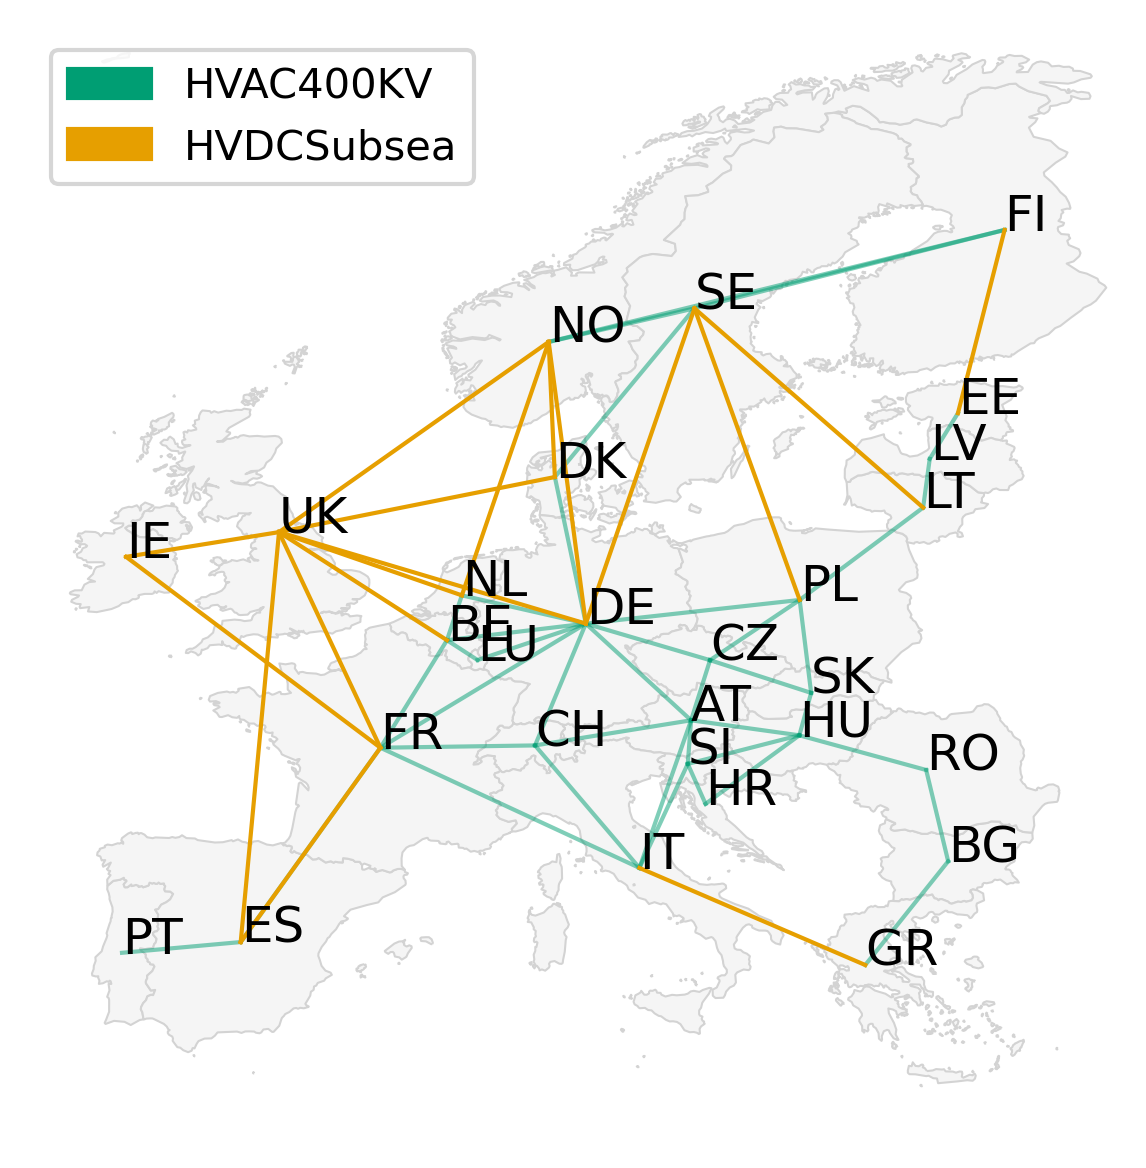

In [22]:
fig, ax = plt.subplots(dpi=300)

# Europe without Norway and UK
highRES_shape.plot(
    ax = ax,
    color = "whitesmoke", 
    edgecolor = "lightgrey", 
    linewidth = 0.5
)

texts = []

for x, y, label in zip(points_europe.rep.x, points_europe.rep.y, points_europe["id"]):
    texts.append(plt.text(x, y, label, fontsize = 12))
    
# plot overhead cables
for i in range(len(df_trans_overhead.index)):
    plt.plot(
        [df_trans_overhead.x1_coord.iloc[i],df_trans_overhead.x2_coord.iloc[i]],
        [df_trans_overhead.y1_coord.iloc[i],df_trans_overhead.y2_coord.iloc[i]],
        '#009E73',
        linewidth = 1,
        alpha = 0.5
    )  

#plot subsea cables
for i in range(len(df_trans_subsea.index)):
    plt.plot(
        [df_trans_subsea.x1_coord.iloc[i],df_trans_subsea.x2_coord.iloc[i]],
        [df_trans_subsea.y1_coord.iloc[i],df_trans_subsea.y2_coord.iloc[i]],
        '#E69F00',
        linewidth = 1,
        alpha = 1,
    )      
    
    
ax.set_axis_off()
plt.xlim([-12,32])
plt.ylim([33,72])

plt.plot()

overhead = mpatches.Patch(color='#009E73', label='HVAC400KV')
subsea = mpatches.Patch(color='#E69F00', label='HVDCSubsea')
plt.legend(handles=[overhead,subsea],loc="upper left")

#plt.savefig('figures/transmission_lines_MENOFS.pdf',bbox_inches='tight')

In [23]:
highRES_shape[['NUTS_ID','geometry']].rename(columns={'NUTS_ID' : 'country'})

,country,geometry
1902,AT,"POLYGON ((15.54245 48.90770, 15.75363 48.85218..."
1903,BE,"POLYGON ((5.10218 51.42900, 5.08780 51.38230, ..."
1916,DK,"MULTIPOLYGON (((14.82540 55.25410, 14.94371 55..."
1920,DE,"MULTIPOLYGON (((9.42015 54.83196, 9.42293 54.8..."
1930,NL,"MULTIPOLYGON (((6.87491 53.40801, 6.91836 53.3..."
1931,PL,"MULTIPOLYGON (((18.95003 54.35831, 19.35966 54..."
1932,PT,"MULTIPOLYGON (((-8.16508 41.81830, -8.05186 41..."
1934,UK,"MULTIPOLYGON (((-0.24042 51.49011, -0.22283 51..."
1941,ES,"MULTIPOLYGON (((4.28746 39.82237, 4.24593 39.8..."
1951,BG,"POLYGON ((22.99717 43.80787, 23.25146 43.83394..."


In [24]:
areas.sort_values(by=['country','tech'])

,area,country,tech
0,8772.1,AT,onshore
0,3600.3,AT,solar
0,2713.1,BE,offshore
1,6018.6,BE,onshore
1,1016.4,BE,solar
...,...,...,...
26,7554.6,SK,onshore
26,1943.9,SK,solar
21,137203.8,UK,offshore
27,128208.9,UK,onshore


In [25]:
gdf_brownfield = areas.pivot(
    index='country', columns = 'tech', values = 'area'
).reset_index().merge(
    highRES_shape[['NUTS_ID','geometry']].rename(columns={'NUTS_ID' : 'country'})
).set_index('country').fillna(0).assign(total = lambda x : x.offshore + x.onshore + x.solar)
gdf_brownfield

,offshore,onshore,solar,geometry,total
country,,,,,
AT,0.0,8772.1,3600.3,"POLYGON ((15.54245 48.90770, 15.75363 48.85218...",12372.4
BE,2713.1,6018.6,1016.4,"POLYGON ((5.10218 51.42900, 5.08780 51.38230, ...",9748.1
BG,3212.2,16087.1,11972.5,"POLYGON ((22.99717 43.80787, 23.25146 43.83394...",31271.8
CH,0.0,552.3,1865.5,"POLYGON ((8.67046 47.68486, 8.79571 47.67560, ...",2417.8
CZ,0.0,29570.3,2603.1,"POLYGON ((14.31787 51.05470, 14.41509 51.02507...",32173.4
DE,29038.0,132204.6,10715.7,"MULTIPOLYGON (((9.42015 54.83196, 9.42293 54.8...",171958.3
DK,63885.8,24216.0,1807.1,"MULTIPOLYGON (((14.82540 55.25410, 14.94371 55...",89908.9
EE,9823.4,33286.6,3776.3,"MULTIPOLYGON (((25.83016 59.56406, 25.88224 59...",46886.3
ES,3999.4,152886.1,114095.2,"MULTIPOLYGON (((4.28746 39.82237, 4.24593 39.8...",270980.7


In [26]:
highRES_shape_slim = highRES_shape[['NUTS_ID','geometry']].rename(columns={'NUTS_ID' : 'country'}).assign(
    center = lambda x : x.geometry.centroid,
    x_coord = lambda x : x.centroid.x,
    y_coord = lambda x : x.centroid.y,
).set_index('country')

/tmp/ipykernel_1480890/564548292.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = lambda x : x.geometry.centroid,
/tmp/ipykernel_1480890/564548292.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_coord = lambda x : x.centroid.x,
/tmp/ipykernel_1480890/564548292.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_coord = lambda x : x.centroid.y,


In [27]:
for country in areas.country.unique():
    temp2 = areas.set_index('country')
    if len(temp2.loc[country]) < 3:
        areas.loc[len(areas.index)] = [0, country, 'offshore']

In [28]:
areas = areas.sort_values(by = ['country','tech']).reset_index(drop=True)

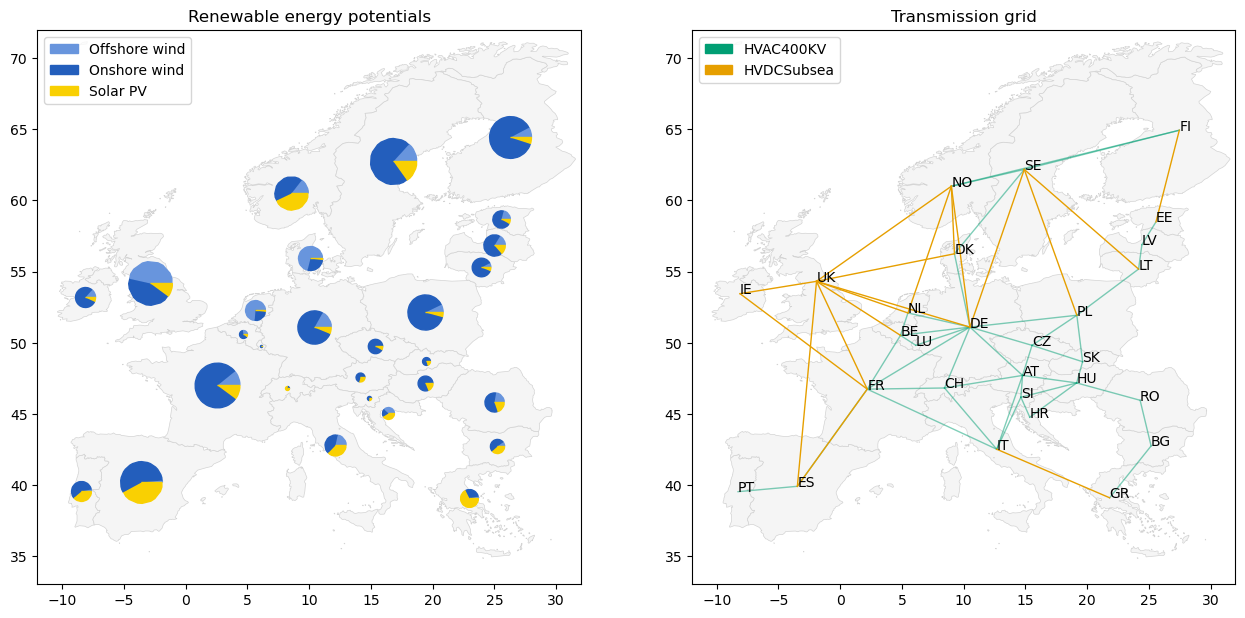

In [29]:
highRES_shape_slim.at['NO', 'x_coord'] = 8.5
highRES_shape_slim.at['NO', 'y_coord'] = 60.5
highRES_shape_slim.at['FR', 'x_coord'] = 2.5
highRES_shape_slim.at['FR', 'y_coord'] = 47

pieList = []

for country in gdf_brownfield.index.unique():
    wedges = []
    for i in range(len(areas.loc[(areas["country"] == str(country))])):
        temp = abs(areas.loc[
            (
                areas["country"] == str(country)
            )
        ].set_index(
            'tech'
        ).area.iloc[i])
        wedges.append(temp)
        #print(temp)
    pie = plt.pie(wedges,
                 colors = [
                    '#6895dd',
                    '#235ebc',
                    '#f9d002',
        ])
    plt.close()
    pieList.append(pie)

piecolors = [
    '#6895dd',
    '#235ebc',
    '#f9d002',
]

offshore = mpatches.Patch(color='#6895dd', label='Offshore wind')
onshore = mpatches.Patch(color='#235ebc', label='Onshore wind')
solar = mpatches.Patch(color='#f9d002', label='Solar PV')

first_legend = plt.legend(
    handles=[
        offshore,
        onshore,
        solar
    ], 
    loc = 'upper left'
)

plt.close()

fig, axes = plt.subplots(1, 2, figsize=(12, 7.2))
fig.subplots_adjust(left=0, right=1)

for i in range(len(gdf_brownfield.index.unique())):
    #print(norway_shape.iloc[i])
    name = highRES_shape_slim.sort_index().iloc[i].name
    for j in range(len(areas.loc[(areas["country"] == str(name))])):
        axes[0].scatter(
            highRES_shape_slim.sort_index().x_coord[i],
            highRES_shape_slim.sort_index().y_coord[i],
            marker=(
                pieList[i][0][j].get_path().vertices.tolist()
            ),
            facecolor=piecolors[j], 
            s=gdf_brownfield.loc[name].total/300,
            zorder=10
        )

highRES_shape.plot(
    ax = axes[0],
    color = "whitesmoke", 
    edgecolor = "lightgrey", 
    linewidth = 0.5
)        
        
highRES_shape.plot(
    ax = axes[1],
    color = "whitesmoke", 
    edgecolor = "lightgrey", 
    linewidth = 0.5
)

texts = []

for x, y, label in zip(points_europe.rep.x, points_europe.rep.y, points_europe["id"]):
    texts.append(plt.text(x, y, label, fontsize = 10))
    
# plot overhead cables
for i in range(len(df_trans_overhead.index)):
    plt.plot(
        [df_trans_overhead.x1_coord.iloc[i],df_trans_overhead.x2_coord.iloc[i]],
        [df_trans_overhead.y1_coord.iloc[i],df_trans_overhead.y2_coord.iloc[i]],
        '#009E73',
        linewidth = 1,
        alpha = 0.5
    )  

#plot subsea cables
for i in range(len(df_trans_subsea.index)):
    plt.plot(
        [df_trans_subsea.x1_coord.iloc[i],df_trans_subsea.x2_coord.iloc[i]],
        [df_trans_subsea.y1_coord.iloc[i],df_trans_subsea.y2_coord.iloc[i]],
        '#E69F00',
        linewidth = 1,
        alpha = 1,
    )      
    
axes[0].legend(handles=[offshore,onshore,solar], loc = 'upper left')
    
ax.set_axis_off()
axes[0].set_xlim([-12,32])
axes[0].set_ylim([33,72])
axes[1].set_xlim([-12,32])
axes[1].set_ylim([33,72])

overhead = mpatches.Patch(color='#009E73', label='HVAC400KV')
subsea = mpatches.Patch(color='#E69F00', label='HVDCSubsea')
plt.legend(handles=[overhead,subsea],loc="upper left")

axes[0].set_title('Renewable energy potentials')
axes[1].set_title('Transmission grid')

plt.savefig('figures/brownfield_capacities.pdf',bbox_inches = 'tight')

In [30]:
gdf_brownfield

,offshore,onshore,solar,geometry,total
country,,,,,
AT,0.0,8772.1,3600.3,"POLYGON ((15.54245 48.90770, 15.75363 48.85218...",12372.4
BE,2713.1,6018.6,1016.4,"POLYGON ((5.10218 51.42900, 5.08780 51.38230, ...",9748.1
BG,3212.2,16087.1,11972.5,"POLYGON ((22.99717 43.80787, 23.25146 43.83394...",31271.8
CH,0.0,552.3,1865.5,"POLYGON ((8.67046 47.68486, 8.79571 47.67560, ...",2417.8
CZ,0.0,29570.3,2603.1,"POLYGON ((14.31787 51.05470, 14.41509 51.02507...",32173.4
DE,29038.0,132204.6,10715.7,"MULTIPOLYGON (((9.42015 54.83196, 9.42293 54.8...",171958.3
DK,63885.8,24216.0,1807.1,"MULTIPOLYGON (((14.82540 55.25410, 14.94371 55...",89908.9
EE,9823.4,33286.6,3776.3,"MULTIPOLYGON (((25.83016 59.56406, 25.88224 59...",46886.3
ES,3999.4,152886.1,114095.2,"MULTIPOLYGON (((4.28746 39.82237, 4.24593 39.8...",270980.7
